## Probability {#sec-probability}

Imagine a game where you flip a single coin once. The possible outcomes are head (H) and tail (T). The set of all possible outcomes of the game is called the *sample* space of the experiment. We will denote this set with $\Omega$. For a single coin toss game, the sample space is $\Omega = \{\text{heads}, \text{tails}\}$.

::: {#def-probability}
## Probability

Let $\Omega$ denote the sample space of a random experiment. Let $A \subseteq \Omega$ and $B \subset \Omega$ be two disjoint events (i.e. $A \cap B = \varnothing$). Disjoint events are events that cannot co-occur. A probability measure on this space has the following properties:

$$
\begin{align}
  & P(A) \geq 0 \qquad \text{non-negativity}\\
  & P(\Omega) = 1 \qquad  \text{unit measure} \\
  & P(A \cup B) = P(A) + P(B) \qquad \text{additivity}
\end{align}
$$
:::

:::{#thm-probability-complement}
## Probability of complementary sets

Let $\Omega$ be a sample space, let $A \subseteq \Omega$ be a subset of the sample space, and let $\bar{A} = \Omega \setminus A$ be the complement of $A$ in $\Omega$. Then the probability of the complementary set is given by:

$$
P(A) = 1 - P(\bar{A})
$$
:::

:::{.proof}
For the proof note that $A$ and $\bar{A}$ are disjoint by definition ($A \cap \bar{A} = \varnothing$). Using the additivity of probability together with the unit probability of the sample space $\Omega$ from @def-probability, it follows that:

$$
\begin{align*}
    P(A \cup \bar{A}) = P(A) + P(\bar{A})
\end{align*}
$$

$$
\begin{align*}
    P(A \cup \bar{A}) & =  P(\Omega) \\
    P(A) + P(\bar{A}) & = 1 \implies \\
    P(A) & = 1 - P(\bar{A}).
\end{align*}
$$
:::

::: {#exm-probability-weather}
## Weather forecast

The weather forecast for the next day shows that it will be raining ($A$) with probability $P(A) = 0.3$. The sample space is $\Omega = \{A, \bar{A}\}$ and the probability of not raining ($\bar{A}$) is then $P(\bar{A}) = 1 - 0.3 = 0.7$.
:::

::: {#exm-probability-dice}
## Dice

In a game where you roll a (6-sided) dice once the sample space is $\Omega = \{1, 2, 3, 4, 5, 6\}$. Denote the outcome of a roll with $X$ and assume that the probability of each outcome is equal: $P(X = i) = 1 / 6, i = 1,2,\ldots,6$. The probability of the event $X = 1$ is then $P(X = 1) = 1/6$. The probability of the event "outcome is not one" is $P(X \neq 1) = P(X > 1) = 5 / 6.$
:::

See @BERTSEKAS2008IntroductionProbability (Chapter 1) for a more thorough treatment of the subject.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

games = pd.DataFrame({
    'x': [0, 1, 2],
    "p_x": [0.5, 0.3, 0.2],
    'y': [0, 1, 2],
    "p_y": [0.5, 0.1, 0.3]
})
games


,x,p_x,y,p_y
0,0,0.5,0,0.5
1,1,0.3,1,0.1
2,2,0.2,2,0.3


In [8]:
# The expected values of the games are:

# E[X] = 0 * 0.5 + 1 * 0.3 + 2 * 0.2 = 0.7
# E[Y] = 0 * 0.5 + 1 * 0.1 + 2 * 0.3 = 0.7

E_X = np.sum(games['x'] * games['p_x'])
E_Y = np.sum(games['y'] * games['p_y'])

print("Expected value of X:", E_X)
print("Expected value of Y:", E_Y)


Expected value of X: 0.7
Expected value of Y: 0.7


## The Normal Distribution

The normal distribution is a continuous probability distribution. It is also called the Gaussian distribution. The probability density function (pdf) of the normal distribution is given by:

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}\\
$$

where $\mu$ is the mean and $\sigma$ is the standard deviation. The normal distribution is symmetric around the mean $\mu$. The standard normal distribution has $\mu = 0$ and $\sigma = 1$.

Instead of writing the density function every time we want to refer to the normal distribution, we use the notation $X \sim N(\mu, \sigma^2)$ to denote that the random variable $X$ has a normal distribution with mean $\mu$ and variance $\sigma^2$.

$$
X \sim N(\mu, \sigma^2) \\
E(X) = \mu \\
Var(X) = \sigma^2 \\
SD(X) = \sqrt{\sigma^2} = \sigma
$$

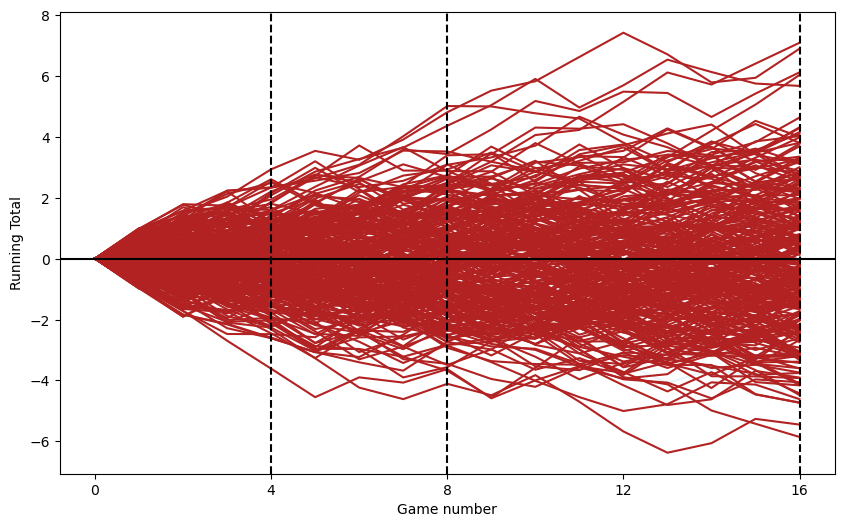

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

players_n = 300
games_n = 16

# Create a DataFrame similar to expand_grid in R
unif_games = pd.DataFrame(np.array(np.meshgrid(np.arange(1, games_n + 1), np.arange(1, players_n + 1))).T.reshape(-1,2), columns=['game', 'player'])

# Add result column with random uniform values between -1 and 1
unif_games['result'] = np.random.uniform(-1, 1, size=len(unif_games))

# Add initial values for each player
initial_values = pd.DataFrame({'player': np.arange(1, players_n + 1), 'game': 0, 'result': 0})
unif_games = pd.concat([unif_games, initial_values])

# Sort values and calculate running total for each player
unif_games = unif_games.sort_values(['player', 'game'])
unif_games['running_total'] = unif_games.groupby('player')['result'].cumsum()

# Plotting
plt.figure(figsize=(10, 6))
for player in unif_games['player'].unique():
    player_data = unif_games[unif_games['player'] == player]
    plt.plot(player_data['game'], player_data['running_total'], color='skyblue' if player < 2 else 'firebrick', alpha=0.2 if player < 2 else 1)

plt.axhline(0, color='black')
plt.axvline(x=4, linestyle='--', color='black')
plt.axvline(x=8, linestyle='--', color='black')
plt.axvline(x=16, linestyle='--', color='black')
plt.xlabel('Game number')
plt.ylabel('Running Total')
plt.xticks([0, 4, 8, 12, 16])
plt.show()